# Faire une régression Linéaire sans Scikit Learn



Rien de tel pour comprendre une descente de gradient que de la coder entièrement. Cela peut paraitre difficile à première vue mais ne vous en faites pas, nous allons vous guider pas à pas. 

N'hésitez pas à revenir sur votre cours de Machine Learning sur les régressions linéaires pour vous rafraichir la mémoire. 

Notre but va être de coder une régression linéaire simple de type : 

`f(x) = a*x + b`

* Importez les librairies suivantes : 
  * Numpy 

In [2]:
import numpy as np 

* Définissez une classe `Model` qui prendra deux méthodes : 
  1. `__init__(self)` qui va vous permettre de définir votre coefficient `a` et votre constante `b`. Ces coefficients seront initialisés de manière aléatoire grâce à Numpy (cf : `np.random.randn`)
  2. `__call__(self, x)` qui va retourner `a*x + b`

In [3]:
class Model():
  def __init__(self):
    self.a = np.random.randn(1)
    self.b = np.random.randn(1)
  
  def __call__(self, x):
    return self.a * x + self.b

* Créez une instance de votre modèle 

In [4]:
model = Model()

In [5]:
model.b

array([0.46453899])

In [6]:
model.a

array([0.44390906])

* Tentez de faire une première "régression" en mettant `model(3.0)`. 
NB : Si vous n'avez pas les même valeurs que ce notebook en output, c'est normal puisque vous avez initialisé vos valeurs aléatoirement 

In [6]:
model(3.0)

array([-4.82554947])

In [7]:
model.a * 3 + model.b

array([-4.82554947])

* Cette valeur correspond à une prédiction aléatoire de votre modèle. Mais nous n'avons pas de données pour le moment. Cette fois, utilisons `sklearn` pour importer des données 
  * Importez `sklearn.datasets`
  * Utilisez la fonction `load_diabetes()` pour charger le dataset du diabète

In [14]:
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

* Nous avons trop de données dans ce dataset, prenez uniquement la troisième colonne du dataset et stockez la dans une variable `diabetes_X`

In [19]:
# Use only one feature
diabetes_X = diabetes.data[:,2]
diabetes_X[:5]

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469])

* Stockez ensuite votre target dans une variable `y`

In [26]:
y = diabetes.target
y[:5]

array([151.,  75., 141., 206., 135.])

* Visualisez vos données en utilisant `Matplotlib`

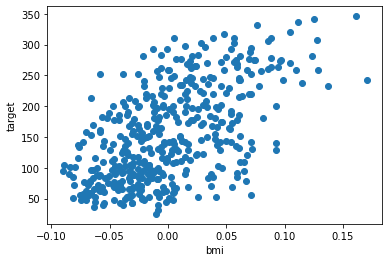

In [29]:
import matplotlib.pyplot as plt 
plt.scatter(diabetes_X, y)
plt.xlabel(diabetes.feature_names[2])
plt.ylabel("target")
plt.show()

* Il faut maintenant qu'on définisse une fonction de coût. Pour une régression linéaire, nous pourrions utiliser la méthode des moindres carrés. 

Pour cela, nous allons calculer la somme des distance entre la valeurs prédite de notre modèle et la valeur réelle et nous allons en calculer la moyenne. Autrement dit, nous aurons : 

`np.mean((model(input) - y)**2)`

C'est ce qu'on peut appeler notre erreur moyenne ou l'écart moyen entre notre prédiction et les valeurs réelles. Notre but va être de minimiser cette fonction de coût. 

  * Créez donc cette fonction qu'on appellera `mse` (pour mean square error). Cette fonction prendra deux arguments `y_pred` & `y_true`

In [24]:
def mse(y_pred, y_true):
  return (np.sum((y_pred - y_true)**2))/len(y_pred)
  # return np.mean((y_pred - y_true)**2)

* Testez votre fonction en insérant `model(diabetes_X)` & `y` en argument 

In [27]:
model(diabetes_X)
print(mse(model(diabetes_X), y))
np.sqrt(mse(model(diabetes_X), y))

28931.447200373088


170.0924666185222

* Visualisez votre régression par rapport à vos points 

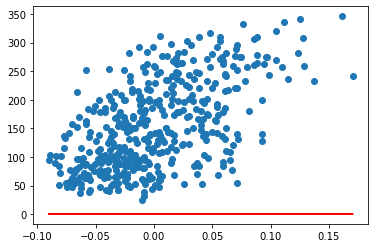

In [30]:
plt.scatter(diabetes_X, y)
plt.plot(diabetes_X,model(diabetes_X), "r")
plt.show()

* Il va falloir qu'on calcule les gradients pour notre variable `model.a` et notre constante `model.b`. Pour cela, il va falloir qu'on revoit nos formules de dérivées. Puisque nous ne sommes pas ici pour faire des mathématiques, nous allons vous donner ces formules. 
  * `derive_model_a = 2/len(y_pred)*np.sum((np.matrix(x) @ (y_pred - y_true)))`
  * `derive_model_b = 2/len(y_pred)*(np.sum(y_pred - y_true))`

  * N'hésitez pas à vous documenter sur cet article si vous souhaitez en savoir plus sur le calcul de la dérivée : [Gradient Descent Derivation](https://mccormickml.com/2014/03/04/gradient-descent-derivation/)


  * En utilisant donc les formules ci-dessus, codez la première fonction `derivative_mse_x` qui prendra les arguments : 
    * `x` --> les valeurs pour votre variable X / `y_pred` --> les valeurs prédites par votre modèle / `y_true` --> les valeurs réelles à prédire


In [34]:
# Calcul de la dérivée pour model.a
def derivative_mse_a(y_pred, y_true, x):
  return 2/len(y_pred)*np.sum((x @ (y_pred - y_true)))
  # return 2/len(y_pred) * np.sum(np.dot(x,(y_pred-y_true)))

* Testez votre fonction 

In [35]:
derivative_mse_a(model(diabetes_X), y, diabetes_X)

-4.294078512786556

* En utilisant donc les formules ci-dessus, codez maintenant la fonction derivative_mse_constant qui prendra les arguments :
    * `y_pred` --> les valeurs prédites par votre modèle / `y_true` --> les valeurs réelles à prédire

In [32]:
# Calcul de la dérivée pour model.b 
def derivative_mse_b(y_pred, y_true):
  return 2/len(y_pred)*(np.sum(y_pred - y_true))

* Testez votre fonction 

In [33]:
derivative_mse_b(model(diabetes_X), y)

-303.33789034433346

* Nous allons tenter de voir si nous pouvons minimiser notre fonction de coût en utilisant les deux gradients du dessus. Pour mettre à jour nos variables, nous avons besoin de soustraire leur gradients respectifs. Ex : 
  * `param = param - learning_rate * gradient`

  * Définissez un `learning_rate` à 0.1
  * Tentez d'appliquer votre formule sur `model.a` et `model.b`

In [36]:
lr = 0.1

print("OLD model.a = " + str(model.a))
print("OLD model.b = " + str(model.b))

model.a -= lr * derivative_mse_a(model(diabetes_X), y, diabetes_X)
# model.a = model.a - lr * derivative_mse_a(model(diabetes_X), y, diabetes_X)
model.b -= lr * derivative_mse_b(model(diabetes_X), y)

print("NEW model.a = " + str(model.a))
print("NEW model.b = " + str(model.b))

OLD model.a = [0.44390906]
OLD model.b = [0.46453899]
NEW model.a = [0.87331691]
NEW model.b = [30.79832803]


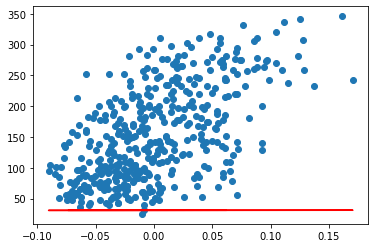

In [37]:
# On visualise nos nouvelles prédictions:

plt.scatter(diabetes_X, y)
plt.plot(diabetes_X,model(diabetes_X), "r")
plt.show()

* Calculez à nouveau votre MSE 

In [38]:
mse(model(diabetes_X), y)

20648.35489185056

* Notre MSE a beaucoup baissé ! C'est une bonne nouvelle mais le processus de descente de gradient est itératif. Vous devrez donc le faire plusieurs fois avant d'arriver à des prédictions précises. 
  * En faisant une boucle, tentez de répéter le processus d'au-dessus 10000 fois 
  * Affichez toutes les 1000 epochs : la mse, model.W & model.b  

In [39]:
# Définission d'un learning rate et d'un nombre d'itérations 
lr = 0.5
epochs = 10000

In [40]:
model = Model()
for epoch in range(epochs):
  # Calcul de la loss
  current_loss = mse(model(diabetes_X), y)
  
  # Mise à jour des variables 
  model.a -= lr * derivative_mse_a(model(diabetes_X), y, diabetes_X)
  model.b -= lr * derivative_mse_b(model(diabetes_X), y)

  # Affichage des variables mises à jour 
  if epoch % 1000 == 0 or epoch == epochs - 1:
    print("-------------------- Epoch {} --------------------".format(epoch))
    print("Current Loss: {}".format(current_loss))
    print("a = {}".format(model.a))
    print("b = {}".format(model.b))

-------------------- Epoch 0 --------------------
Current Loss: 28947.510117334343
a = [2.67571746]
b = [152.13348416]
-------------------- Epoch 1000 --------------------
Current Loss: 3912.4182225443697
a = [851.13383616]
b = [152.13348416]
-------------------- Epoch 2000 --------------------
Current Loss: 3890.6933436168547
a = [939.22868779]
b = [152.13348416]
-------------------- Epoch 3000 --------------------
Current Loss: 3890.459137840406
a = [948.37551863]
b = [152.13348416]
-------------------- Epoch 4000 --------------------
Current Loss: 3890.4566129772793
a = [949.32522809]
b = [152.13348416]
-------------------- Epoch 5000 --------------------
Current Loss: 3890.456585757909
a = [949.4238358]
b = [152.13348416]
-------------------- Epoch 6000 --------------------
Current Loss: 3890.45658546447
a = [949.43407418]
b = [152.13348416]
-------------------- Epoch 7000 --------------------
Current Loss: 3890.4565854613065
a = [949.43513722]
b = [152.13348416]
------------------

In [26]:
np.sqrt(3890)

62.369864518050704

* En utilisant `Matplotlib`, visualisez à nouveau votre modèle et vos valeurs réelles 

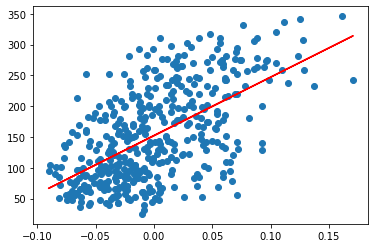

In [27]:
plt.scatter(diabetes_X, y)
plt.plot(diabetes_X, model(diabetes_X), "r")
plt.show()

**Nous avons cette fois une belle régression !** 